<a href="https://colab.research.google.com/github/Sergey-Kiselev-dev/ML_sem_pub/blob/main/ML_04_selfedu_ml_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
x_train = np.array([[10, 50], [20, 30], [25, 30], [20, 60], [15, 70], [40, 40], [30, 45], [20, 45], [40, 30], [7, 35]])
y_train = np.array([-1, 1, 1, -1, -1, 1, 1, -1, 1, -1])

In [29]:
np.random.seed(1)

# исходные параметры распределений двух классов
r1 = 0.8
D1 = 1.0
mean1 = [0, -3]
V1 = [[D1, D1 * r1], [D1 * r1, D1]]

r2 = 0.7
D2 = 2.0
mean2 = [0, 3]
V2 = [[D2, D2 * r2], [D2 * r2, D2]]

1


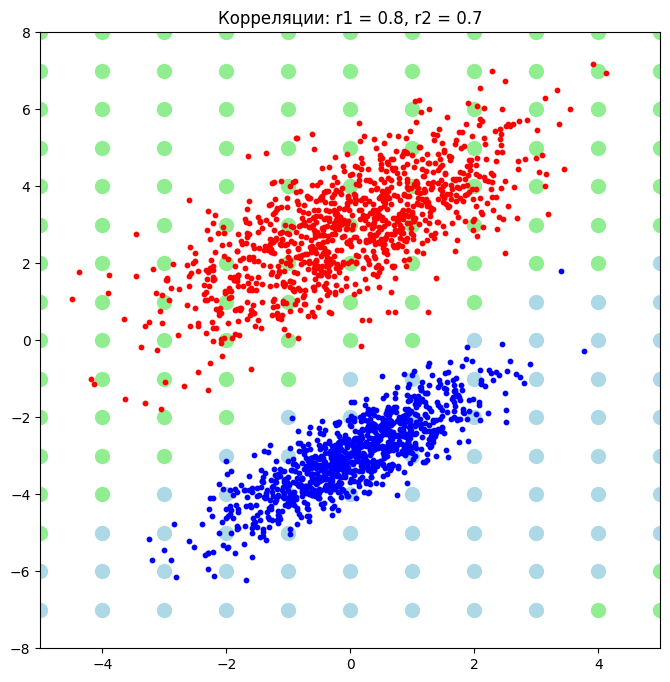

In [26]:
# моделирование обучающей выборки
N = 1000
x1 = np.random.multivariate_normal(mean1, V1, N).T
x2 = np.random.multivariate_normal(mean2, V2, N).T

# вычисление оценок МО и ковариационных матриц
mm1 = np.mean(x1.T, axis=0)
mm2 = np.mean(x2.T, axis=0)

a = (x1.T - mm1).T
VV1 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

a = (x2.T - mm2).T
VV2 = np.array([[np.dot(a[0], a[0]) / N, np.dot(a[0], a[1]) / N],
                [np.dot(a[1], a[0]) / N, np.dot(a[1], a[1]) / N]])

# модель гауссовского байесовского классификатора
Py1, L1 = 0.5, 1  # вероятности появления классов
Py2, L2 = 1 - Py1, 1  # и величины штрафов неверной классификации

b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(
    np.linalg.det(v))

# x = np.array([0, -4])  # входной вектор в формате (x, y)
x = np.array([+4, +6])  # входной вектор в формате (x, y)
a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # классификатор
print(a)

# вывод графиков
plt.figure(figsize=(8, 8))
plt.title(f"Корреляции: r1 = {r1}, r2 = {r2}")
for iy in range(-7, +9, 1):
  for ix in range(-5, +6, 1):
    x = np.array([ix, iy])
    # print(x)
    b = lambda x, v, m, l, py: np.log(l * py) - 0.5 * (x - m) @ np.linalg.inv(v) @ (x - m).T - 0.5 * np.log(np.linalg.det(v))
    a = np.argmax([b(x, VV1, mm1, L1, Py1), b(x, VV2, mm2, L2, Py2)])  # классификатор
    clr = 'lightblue'
    if a == 1: clr = 'lightgreen'
    plt.scatter(ix, iy, color=clr, marker='o', s = 100)
plt.scatter(x1[0], x1[1], s = 10, color='blue')
plt.scatter(x2[0], x2[1], s = 10, color='red')
plt.xlim([-5, +5])
plt.ylim([-8, +8])
plt.show()